In [2]:
import numpy as np
import matplotlib.pyplot as plt
import spacy

In [41]:
nlp = spacy.load("en_core_web_trf")
import en_core_web_trf
nlp = en_core_web_trf.load()

In [124]:
# load text file
with open('Objective_with_time_frame.txt', 'r', encoding='utf8') as file:
    text = file.read().replace('\n', '')

In [126]:
per_country = text.split('Files\\\\')[1:]
countries = [count.split('-')[0][:-1] for count in per_country]

In [129]:
# stopwords
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print(spacy_stopwords)

{'by', '‘ll', 'after', 'made', 'while', 'am', 'himself', 'perhaps', 'to', 'most', '’ll', 'its', 'except', 'or', 'beforehand', 'ours', 'without', 'yours', 'hereby', 'my', 'another', 'put', 'nor', 'should', 'during', 'which', 'an', 'whole', 'themselves', 'quite', '‘m', 'bottom', 'be', 'sometime', 'over', 'yet', 'doing', "'ll", 'anyway', 'eight', 'give', 'the', 'when', 'others', 'therefore', 'also', 'alone', 'ever', '‘re', 'being', 'whoever', 'still', 'other', 'even', "'re", 'these', '‘s', 'top', 'about', 'together', 'much', 'somehow', 'beside', 'five', 'whether', "'ve", 'sometimes', 'few', 'something', 'back', 'make', 'seemed', 'whence', 'their', 'whereas', 'therein', 'mostly', 'afterwards', 'no', 'since', 'often', 'show', 'nowhere', 'n’t', 'where', 'both', 'he', 'twelve', 'a', 'none', 'unless', 'but', 're', 'may', 'less', 'formerly', 'further', 'if', 'n‘t', 'either', 'me', 'what', 'behind', 'rather', 'some', 'whither', 'then', 'has', 'wherever', 'using', 'hundred', 'everything', 'there'

In [139]:
text = []
for count in per_country:
    references = count.split('% Coverage')[2:]
    references_together = ''
    for i,ref in enumerate(references):
        if i != 0:
            if references_together[-1] != '.':
                references_together += '.'
            references_together += ' '
        references_together += ref.split('Reference')[0]
    #remove stopwords
    doc = nlp(references_together)
    cleaned = ''
    for word in doc:
        if word.is_stop==False:
            cleaned+=str(word)
            cleaned += ' '
    text.append(cleaned)

In [146]:
vectors = []
for i,txt in enumerate(text):
    doc = nlp(txt[:724])
    vector = doc._.trf_data.tensors[-1]
    vectors.append(doc._.trf_data.tensors[-1].reshape(-1))

vectors = np.array(vectors)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [15.0, 15.0, 40.0, 40.0],
  [5.0, 5.0, 27.5, 27.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [72.5, 72.5, 100.0, 100.0],
  [16.25, 16.25, 86.25, 86.25]],
 'dcoord': [[0.0, 1.1431445942661236, 1.1431445942661236, 0.0],
  [0.0, 1.1796475694363298, 1.1796475694363298, 0.0],
  [1.1431445942661236,
   1.5368910434492513,
   1.5368910434492513,
   1.1796475694363298],
  [0.0, 2.1424180908463017, 2.1424180908463017, 1.5368910434492513],
  [0.0, 3.6238008018766994, 3.6238008018766994, 2.1424180908463017],
  [0.0, 1.9506410671885017, 1.9506410671885017, 0.0],
  [0.0, 2.5892237019097313, 2.5892237019097313, 1.9506410671885017],
  [0.0, 3.664641707825068, 3.664641707825068, 0.0],
  [2.5892237019097313,
   4.174973080390424,
   4.174973080390424,
   3.664641707825068],
  [3.6238008018766994,
   12.348928629653548,
   12.348928629653548,
   4.174973080390424

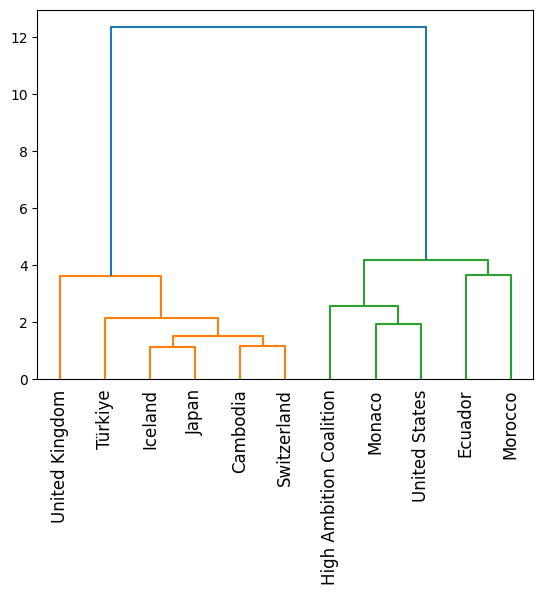

In [147]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(vectors, 'ward')
dendrogram(Z, labels=countries, leaf_rotation=90)

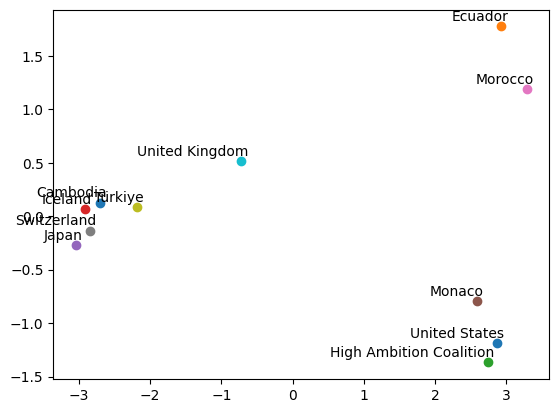

In [151]:
from sklearn.decomposition import PCA
decomposer = PCA(n_components=2)
decomposer.fit(vectors)
vectors_2d = decomposer.transform(vectors)

# label each point with its country
for i, country in enumerate(countries):
    x, y = vectors_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(country, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

In [164]:
# Construction via add_pipe with the default GPT 3.5 model and an explicitly defined task
config = {"task": {"@llm_tasks": "spacy.NER.v3", "labels": ["PERSON", "ORGANISATION", "LOCATION"]}}
llm = nlp.add_pipe("llm", config=config)

# Construction via add_pipe with a task-specific factory and default GPT3.5 model
llm = nlp.add_pipe("llm-ner")

# Construction from class
from spacy_llm.pipeline import LLMWrapper
llm = LLMWrapper(vocab=nlp.vocab, task=task, model=model, cache=cache, save_io=True)

ValueError: [E002] Can't find factory for 'llm' for language English (en). This usually happens when spaCy calls `nlp.create_pipe` with a custom component name that's not registered on the current language class. If you're using a Transformer, make sure to install 'spacy-transformers'. If you're using a custom component, make sure you've added the decorator `@Language.component` (for function components) or `@Language.factory` (for class components).

Available factories: attribute_ruler, tok2vec, merge_noun_chunks, merge_entities, merge_subtokens, token_splitter, doc_cleaner, parser, beam_parser, lemmatizer, trainable_lemmatizer, entity_linker, entity_ruler, tagger, morphologizer, ner, beam_ner, senter, sentencizer, spancat, spancat_singlelabel, span_finder, future_entity_ruler, span_ruler, textcat, textcat_multilabel, en.lemmatizer